#### <b>1 <span style='color:#B21010'>|</span> Đọc dữ liệu và tính số dòng và cột</b>

👉 Đầu tiên ta import, cài đặt các thư viện cần thiết.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

👉 Tiếp đến đọc file `"Sample - Superstore.csv"` vào dataframe `df` và in ra 5 dòng đầu tiên của dataframe.

In [2]:
# Tên file chứa data
DATA_FILE_NAME = "Sample - Superstore.csv"
df = pd.read_csv(DATA_FILE_NAME, encoding= 'unicode_escape')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


👉 Tính số dòng và số cột và lưu vào 2 biến `num_rows` và `num_cols`.

In [3]:
num_rows, num_cols = df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

Number of rows: 9994
Number of columns: 21


#### <b>2 <span style='color:#B21010'>|</span> Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?</b>

* Bộ dữ liệu chứa thông tin liên quan đến Bán hàng, lợi nhuận và các nhân tố thú vị khác của một siêu thị lớn.
* Mỗi dòng là thông tin của một sản phẩm được mua bao gồm các thông tin về sản phẩm và thông tin về khách hàng mua sản phẩm.
<br>
**=> Vì thế sẽ không xuất hiện dòng có ý nghĩa khác.** 

#### <b>3 <span style='color:#B21010'>|</span> Dữ liệu có các dòng bị lặp không?</b>

👉 Ta kiểm tra xem có dòng nào bị lặp không bằng cách sử dụng các phương thức `duplicated()` và `any()` trên dataframe `df` và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu ngược.

In [4]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

💡 Ta thấy rằng dữ liệu không có dòng nào bị trùng lặp.

#### <b>4 <span style='color:#B21010'>|</span> Tỷ lệ giá trị thiếu, thống kê mô tả và sự phân bố giá trị của từng cột</b>

Để tính tỷ lệ giá trị thiếu, sử dụng phương thức `isna()` và `mean()` và lưu vào biến `missing_rate`.

Để thống kê mô tả mỗi cột dữ liệu dạng số, sử dụng phương thức `describe()`.
Trong đó:
* `count`: số lượng giá trị không bị thiếu trong cột.
* `mean` : giá trị trung bình của các giá trị trong cột.
* `std` : độ lệch chuẩn của các giá trị trong cột.
* `min` : giá trị nhỏ nhất trong cột.
* `25%`, `50%`, `75%` : các **`phân vị`** tương ứng với các mức phân chia dữ liệu là `25%`, `50%` và `75%`.
* `max` : giá trị lớn nhất trong cột.

Để thống kê mô tả mỗi cột dữ liệu dạng phân loại, sử dụng phương thức `describe()` và tính các giá trị `value_ratios`.
Trong đó:
- `count`: số lượng giá trị không bị thiếu trong cột.
- `unique`: số lượng các giá trị khác nhau (không xét giá trị thiếu).
- `top`: giá trị có tần suất xuất hiện nhiều nhất của thuộc tính.
- `freq`: tần suất xuất hiện của giá trị `top`.
- `value_ratios`: tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sắp xếp giảm dần (không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu). Các tỉ lệ này được lưu vào một dictionary cho mỗi thuộc tính, key là giá trị, value là tỉ lệ %.

👉 Thống kê các cột `numerical`.

In [5]:
describe = df.describe()
missing_rates = df[describe.columns].isna().mean()
missing_rates.name = 'missing_rate'
describe = pd.concat([describe, missing_rates.to_frame().T])
describe

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000
missing_rate,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


👉 Trực quan sự phân bố các giá trị thiếu bằng thư viện `missingno`.

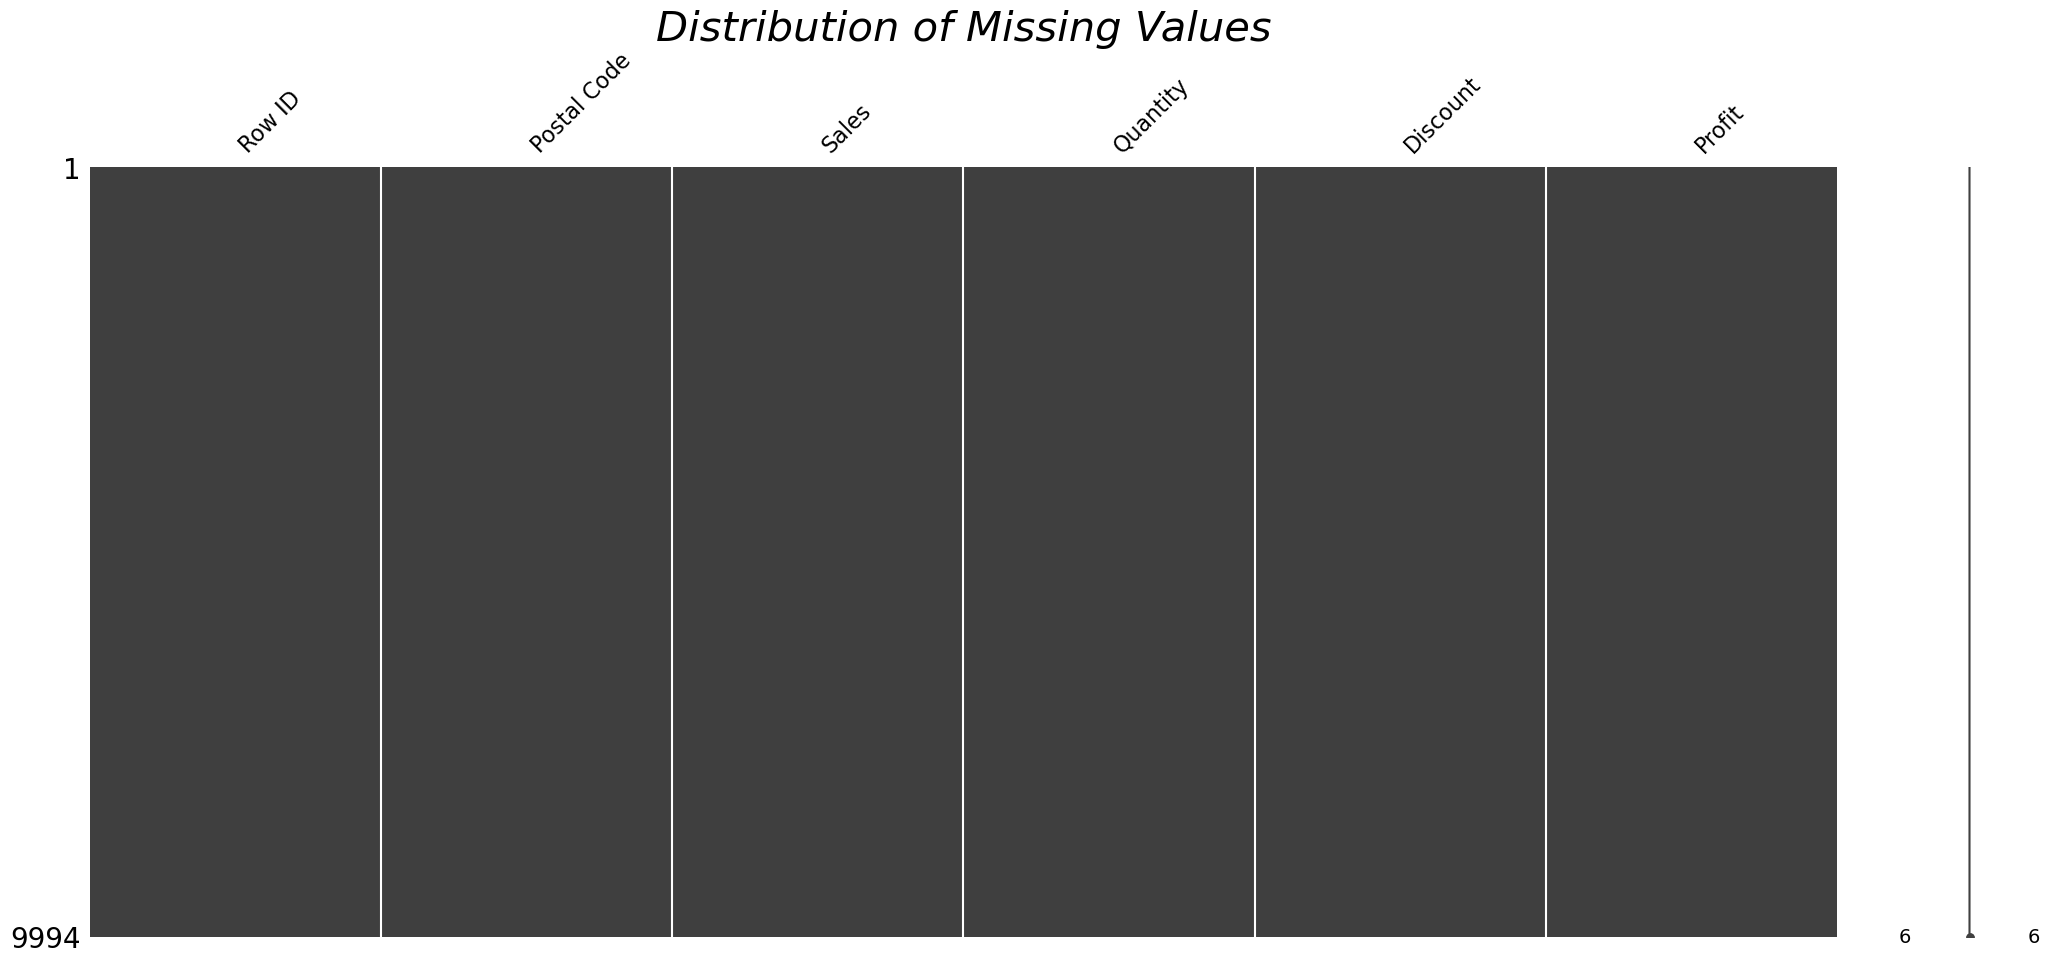

In [6]:
msno.matrix(df[describe.columns])
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique');

👉 Biểu đồ `histogram` cho các cột `numerical`.

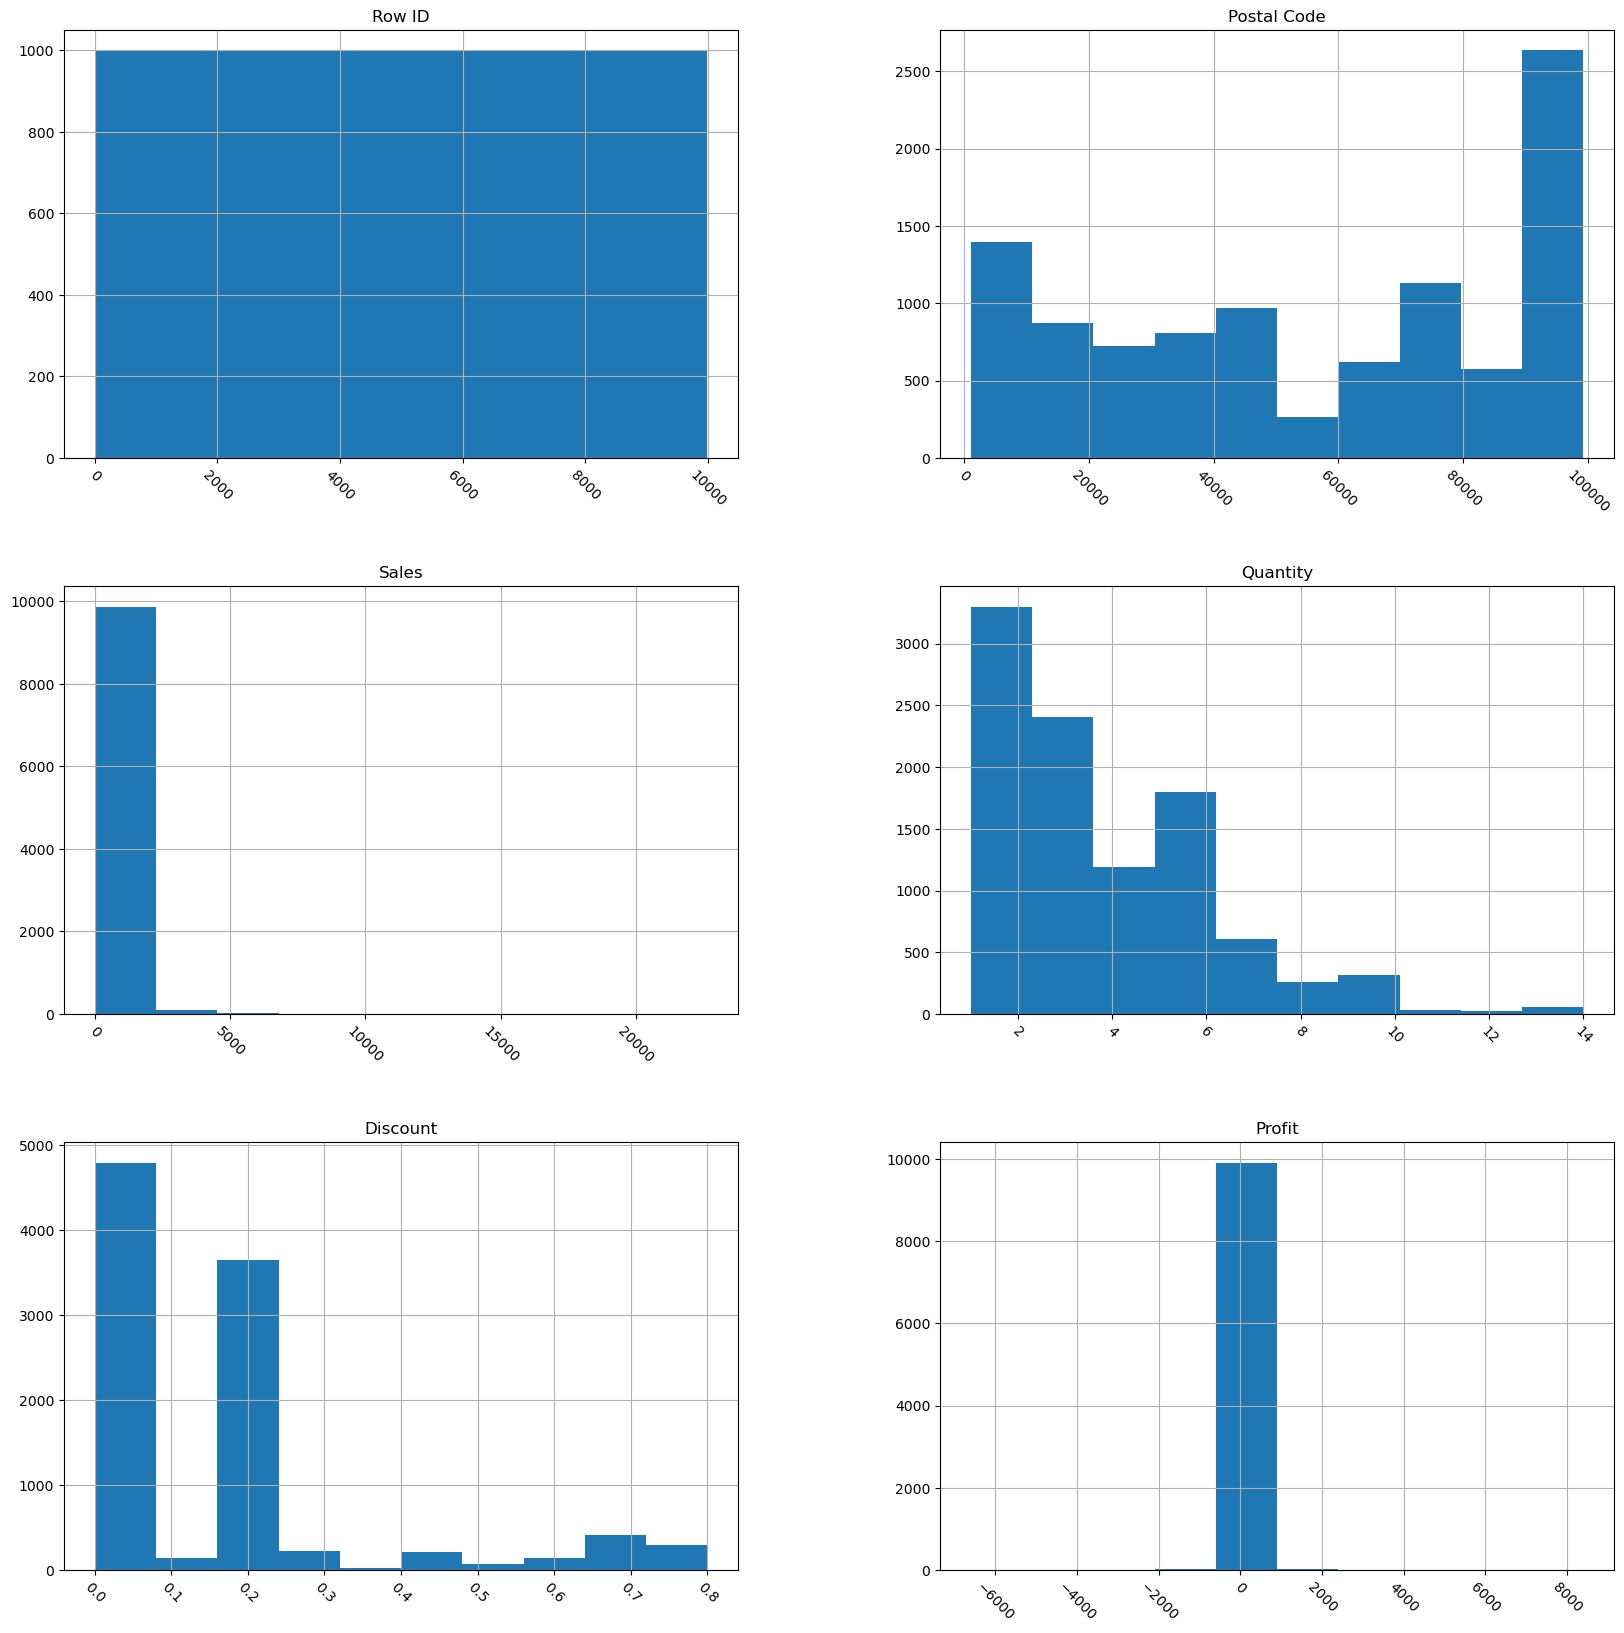

In [7]:
df.hist(figsize=(20,20), xrot=-45)
plt.show()

💬 **Nhận xét**:
- Các cột dữ liệu dạng số hoàn toàn không có giá trị thiếu.
- Cột `Row ID` thể hiện index của mỗi dòng nên ta có thể lược bỏ bởi vì giá trị của nó không ảnh hưởng đến kết quả phân tích.
- Các giá trị `min`, `lower quartile`, `median`, `upper quartile` và `max` của các thuộc tính dạng số còn lại không cho thấy điều bất thường nên ta không cần thực hiện các bước tiền xử lý đối với các thuộc tính này.

👉 Thống kê các cột `categorical`.

In [8]:
describe = df.describe(include=['O'])
missing_rates = df[describe.columns].isna().mean()
missing_rates.name = 'missing_rate'
value_ratios_dict = {}
for col in describe.columns:
    value_ratios_dict[col] = dict(df[col].value_counts(normalize=True) * 100)
value_ratios_df = pd.DataFrame({'value_ratios': value_ratios_dict})
value_ratios_df = value_ratios_df.transpose()[describe.columns]
describe = pd.concat([describe, missing_rates.to_frame().T, value_ratios_df])
pd.set_option('display.max_colwidth', None)
display(describe)
pd.reset_option('display.max_colwidth')

Order ID  \
count                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      9994   
unique                                                           

👉 Trực quan sự phân bố các giá trị thiếu bằng thư viện `missingno`.

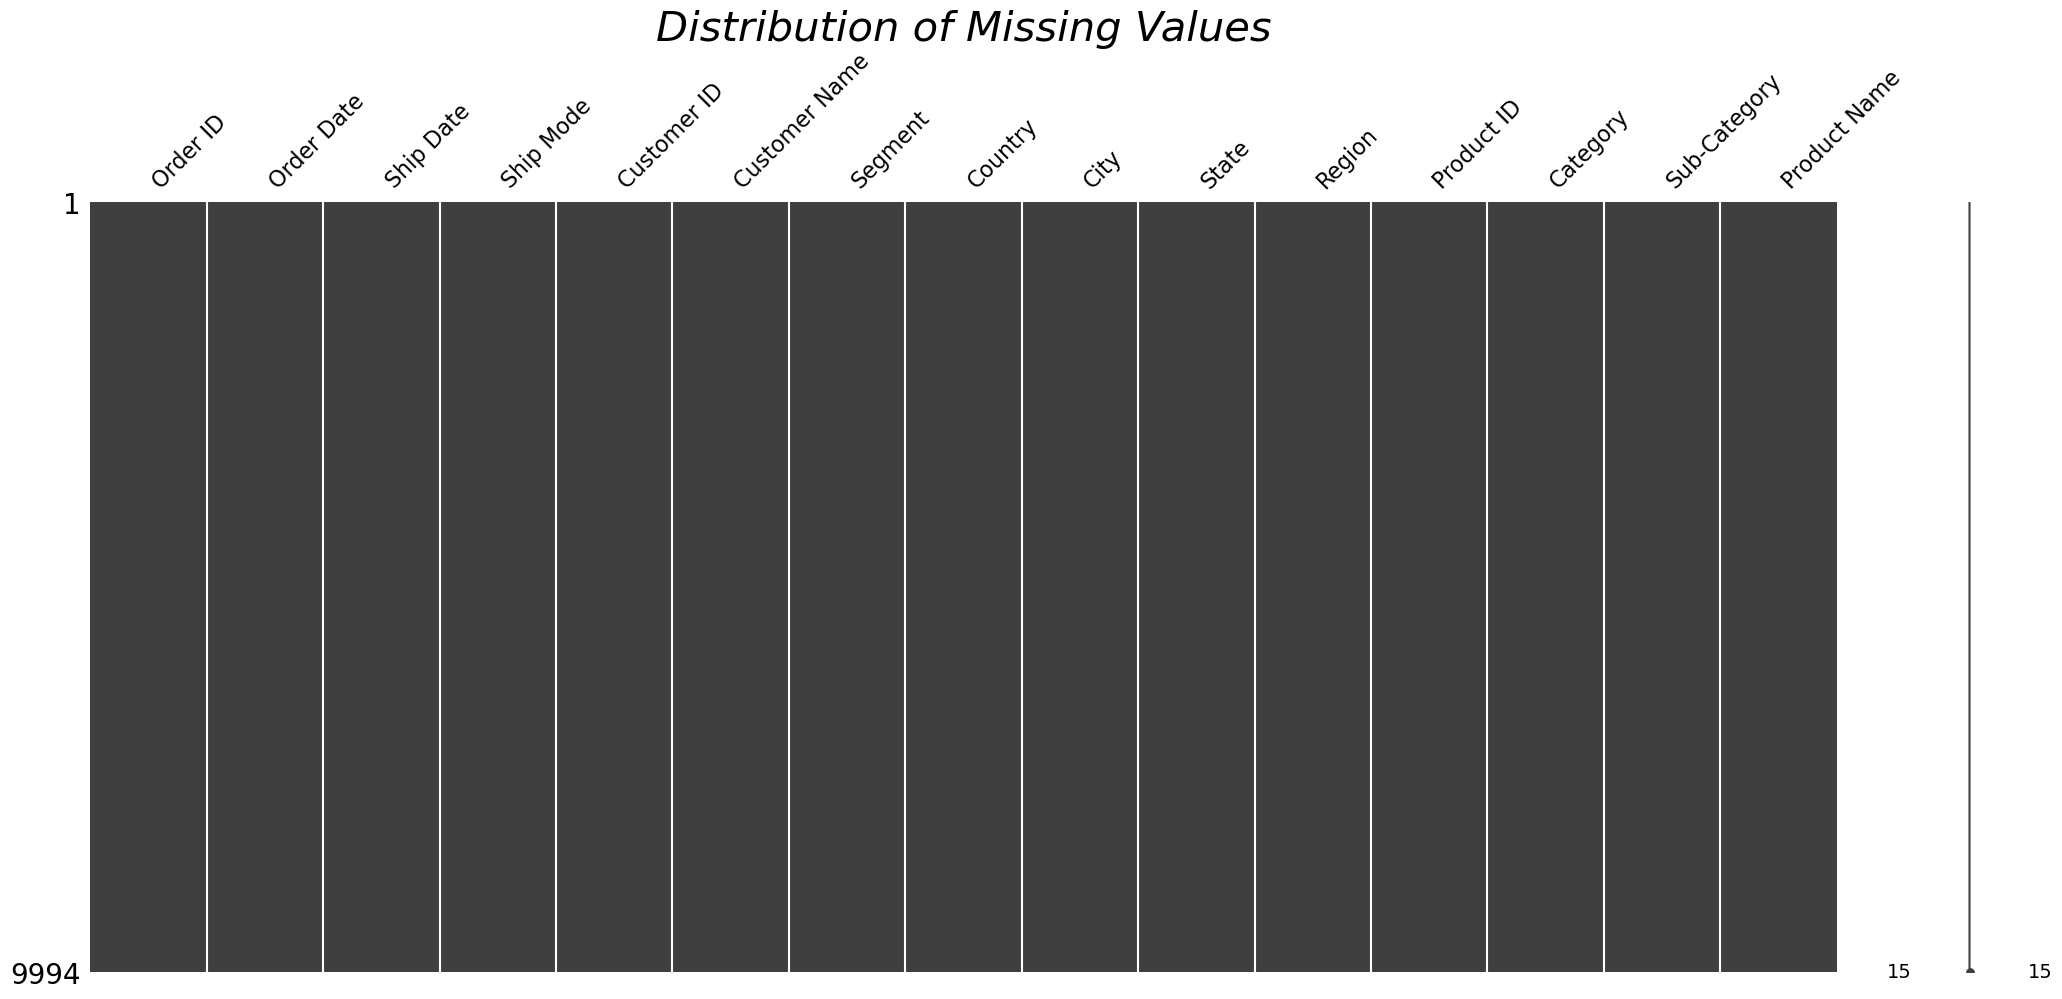

In [9]:
msno.matrix(df[describe.columns])
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique');

💬 Nhận xét:
- Các cột dữ liệu dạng phân loại hoàn toàn không có giá trị thiếu.
- Thuộc tính `Country` chỉ có 1 giá trị duy nhất là `United States`, cho thấy toàn bộ đơn hàng đều đến từ Hoa Kỳ, ta có thể lược bỏ bởi vì giá trị của nó không ảnh hưởng đến kết quả phân tích.

#### <b>5 <span style='color:#B21010'>|</span> Kiểu dữ liệu của mỗi cột</b>

👉 Ta sử dụng phương thức `dtypes` trên dataframe `df` để xem kiểu dữ liệu của mỗi cột. Kết quả được lưu vào series `col_dtypes`; series này có index là tên các cột và giá trị là kiểu dữ liệu của các cột tương ứng.

In [10]:
col_dtype = df.dtypes
col_dtype

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

👉 Chuyển `Order Date` và `Ship Date` sang kiểu dữ liệu `datetime`

In [11]:
df['Order Date'] = df['Order Date'].astype('datetime64[ns]')
df['Ship Date'] = df['Ship Date'].astype('datetime64[ns]')

👉 Ta sử dụng phương thức `select_dtypes` để liệt kê các cột kiểu `numerical` và `categorical`.

In [12]:
cat_columns  = df.select_dtypes(['object']).columns
num_columns  = df.select_dtypes(['number']).columns
print(cat_columns)
print(num_columns)

Index(['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'Country', 'City', 'State', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name'],
      dtype='object')
Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')


#### <b>6 <span style='color:#B21010'>|</span> Xem xét tập giá trị của các thuộc tính phân loại</b>

Xem xét mỗi thuộc tính phân loại có bao nhiêu giá trị phân biệt bằng phương thức `set()`.

In [13]:
for col in cat_columns:
    print(len(set(df[col])), 'unique values of ', col, '\n', set(df[col]))

5009 unique values of  Order ID 
 {'US-2015-108966', 'CA-2017-100097', 'CA-2016-121020', 'CA-2015-131352', 'CA-2014-141796', 'CA-2017-100580', 'CA-2017-121160', 'CA-2016-130001', 'CA-2014-103702', 'CA-2017-152695', 'CA-2017-149468', 'US-2016-128293', 'CA-2014-105165', 'CA-2017-107314', 'CA-2017-105886', 'CA-2017-151211', 'CA-2016-130407', 'CA-2014-148761', 'US-2017-166394', 'CA-2017-137596', 'CA-2017-166436', 'CA-2016-160304', 'CA-2015-167255', 'US-2014-115189', 'CA-2014-100293', 'CA-2017-134173', 'CA-2017-162691', 'CA-2016-162138', 'CA-2016-163636', 'CA-2014-149594', 'CA-2017-148922', 'CA-2014-163559', 'CA-2016-107615', 'CA-2014-166989', 'CA-2015-138674', 'CA-2015-109386', 'CA-2017-155698', 'CA-2014-153479', 'CA-2017-113558', 'CA-2017-156958', 'CA-2017-143651', 'CA-2015-137302', 'CA-2017-161102', 'CA-2016-103464', 'CA-2016-125206', 'CA-2016-138688', 'CA-2016-118689', 'CA-2016-153101', 'CA-2014-153983', 'CA-2016-104689', 'CA-2015-122266', 'CA-2016-113551', 'CA-2015-162369', 'CA-2015-11

Nhận xét:
- Số lượng giá trị phân biệt của 'Customer ID' và 'Customer Name' bằng nhau (= 793) chứng tỏ không có sự trùng tên giữa các khách hàng.
- Số lượng giá trị phân biệt của 'Product ID' lớn hơn 'Product Name' (1862 > 1850) cho thấy có sản phẩm trùng tên nhau nhưng khác mã sản phẩm.
- Số lượng giá trị phân biệt của 'Order ID' nhỏ hơn số dòng của tập dữ liệu (5009 < 9994). Điều này là do mỗi dòng chỉ thể hiện thông tin của 1 sản phẩm trong 1 đơn hàng. Ta dựa vào 'Order ID' và 'Product ID' để phân biệt các dòng trong tập dữ liệu.
- Thuộc tính 'Country' chỉ có 1 giá trị phân biệt là 'United States' thể hiện đây là cửa hàng nội địa Hoa Kỳ.
- Các vùng trong cột Region không được chia theo 5 vùng vị trí địa lý của Hoa Kỳ (Northeast, Southwest, West, Southeast, and Midwest).

Nhìn chung, tập giá trị của các thuộc tính phân loại đầy đủ, dễ hiểu nên ta không cần thực hiện các bước tiền xử lý đối với các thuộc tính này.